<ipython-input-1-f26b4dc6741c>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(cmap)(norm(values))


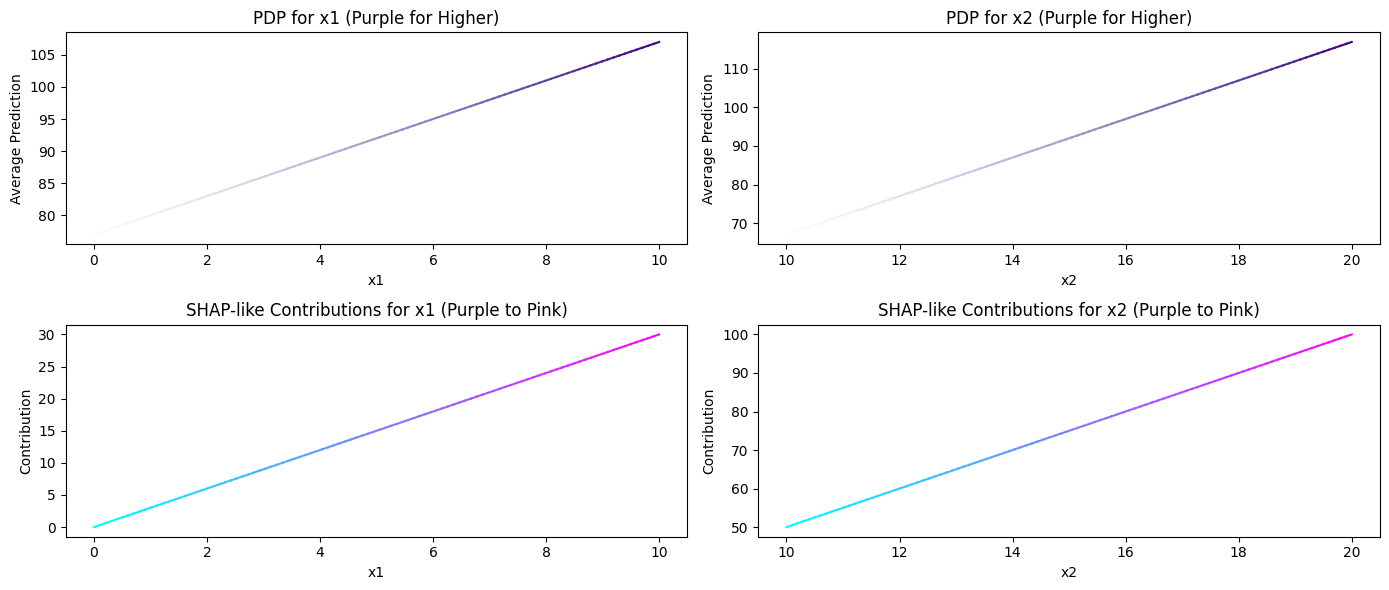

SHAP-like Contributions for x1:
x1[0]: 0.00
x1[1]: 0.30
x1[2]: 0.61
x1[3]: 0.91
x1[4]: 1.21
x1[5]: 1.52
x1[6]: 1.82
x1[7]: 2.12
x1[8]: 2.42
x1[9]: 2.73
x1[10]: 3.03
x1[11]: 3.33
x1[12]: 3.64
x1[13]: 3.94
x1[14]: 4.24
x1[15]: 4.55
x1[16]: 4.85
x1[17]: 5.15
x1[18]: 5.45
x1[19]: 5.76
x1[20]: 6.06
x1[21]: 6.36
x1[22]: 6.67
x1[23]: 6.97
x1[24]: 7.27
x1[25]: 7.58
x1[26]: 7.88
x1[27]: 8.18
x1[28]: 8.48
x1[29]: 8.79
x1[30]: 9.09
x1[31]: 9.39
x1[32]: 9.70
x1[33]: 10.00
x1[34]: 10.30
x1[35]: 10.61
x1[36]: 10.91
x1[37]: 11.21
x1[38]: 11.52
x1[39]: 11.82
x1[40]: 12.12
x1[41]: 12.42
x1[42]: 12.73
x1[43]: 13.03
x1[44]: 13.33
x1[45]: 13.64
x1[46]: 13.94
x1[47]: 14.24
x1[48]: 14.55
x1[49]: 14.85
x1[50]: 15.15
x1[51]: 15.45
x1[52]: 15.76
x1[53]: 16.06
x1[54]: 16.36
x1[55]: 16.67
x1[56]: 16.97
x1[57]: 17.27
x1[58]: 17.58
x1[59]: 17.88
x1[60]: 18.18
x1[61]: 18.48
x1[62]: 18.79
x1[63]: 19.09
x1[64]: 19.39
x1[65]: 19.70
x1[66]: 20.00
x1[67]: 20.30
x1[68]: 20.61
x1[69]: 20.91
x1[70]: 21.21
x1[71]: 21.52
x1[

In [1]:
# Advanced Example: Mimicking SHAP and PDP with Color-coded Outputs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Generate sample data
x1 = np.linspace(0, 10, 100)  # Feature 1
x2 = np.linspace(10, 20, 100)  # Feature 2
y = 3 * x1 + 5 * x2 + 2  # Target variable

# Mimicking Partial Dependence Plots (PDP)
pdp_x1 = [np.mean(3 * x + 5 * x2 + 2) for x in x1]
pdp_x2 = [np.mean(3 * x1 + 5 * x + 2) for x in x2]

# Mimicking SHAP-like contributions
shap_x1 = 3 * x1
shap_x2 = 5 * x2

# Define a function to map values to colors (pink to purple)
def value_to_color(values, cmap="coolwarm"):
    norm = plt.Normalize(vmin=min(values), vmax=max(values))
    colors = cm.get_cmap(cmap)(norm(values))
    return colors

# Colors for PDP plots
colors_x1 = value_to_color(pdp_x1, cmap="Purples")
colors_x2 = value_to_color(pdp_x2, cmap="Purples")

# Colors for SHAP-like contributions
colors_shap_x1 = value_to_color(shap_x1, cmap="cool")  # Purple (higher values)
colors_shap_x2 = value_to_color(shap_x2, cmap="cool")  # Purple (higher values)

# Visualization
plt.figure(figsize=(14, 6))

# Plot PDP for x1
plt.subplot(2, 2, 1)
for i in range(len(x1) - 1):
    plt.plot(x1[i:i+2], pdp_x1[i:i+2], color=colors_x1[i])
plt.xlabel("x1")
plt.ylabel("Average Prediction")
plt.title("PDP for x1 (Purple for Higher)")

# Plot PDP for x2
plt.subplot(2, 2, 2)
for i in range(len(x2) - 1):
    plt.plot(x2[i:i+2], pdp_x2[i:i+2], color=colors_x2[i])
plt.xlabel("x2")
plt.ylabel("Average Prediction")
plt.title("PDP for x2 (Purple for Higher)")

# Plot SHAP-like values for x1
plt.subplot(2, 2, 3)
for i in range(len(x1) - 1):
    plt.plot(x1[i:i+2], shap_x1[i:i+2], color=colors_shap_x1[i])
plt.xlabel("x1")
plt.ylabel("Contribution")
plt.title("SHAP-like Contributions for x1 (Purple to Pink)")

# Plot SHAP-like values for x2
plt.subplot(2, 2, 4)
for i in range(len(x2) - 1):
    plt.plot(x2[i:i+2], shap_x2[i:i+2], color=colors_shap_x2[i])
plt.xlabel("x2")
plt.ylabel("Contribution")
plt.title("SHAP-like Contributions for x2 (Purple to Pink)")

plt.tight_layout()
plt.show()

# Print SHAP-like contributions with color-coding
def print_contributions(contribs, feature_name):
    for i, contrib in enumerate(contribs):
        color = "\033[95m" if contrib < np.median(contribs) else "\033[94m"  # Pink for lower, Purple for higher
        reset = "\033[0m"
        print(f"{color}{feature_name}[{i}]: {contrib:.2f}{reset}")

print("SHAP-like Contributions for x1:")
print_contributions(shap_x1, "x1")

print("\nSHAP-like Contributions for x2:")
print_contributions(shap_x2, "x2")
